In [4]:
# Primero importamos algunas librerías que necesitaremos más adelante
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

# Algoritmos de regresión avanzados

## Ejemplo de datos tabulares

En verano, cuanto más calor hace más helados como. Digamos quiero predecir cuantos helados voy a comer un día de verano. Para ello he medido durante dos días la temperatura que hacía, cuantos helados nos hemos comido yo y dos amigos:

Yo:
- Día 1: Hacía 30 grados y me he comido 3 helados
- Día 2: Hacía 33 grados y me he comido 5 helados

Amigo 1:
- Día 1: Hacía 29 grados y me he comido 1 helados
- Día 2: Hacía 35 grados y me he comido 4 helados

Amigo 2:
- Día 1: Hacía 32 grados y me he comido 6 helados
- Día 2: Hacía 38 grados y me he comido 15 helados

Además de esto, sabemos cuando pesamos:
Yo = 78 kg
Amigo 1 = 65
Amigo 2 = 90 kg

Por último, sabemos que mis amigos fueron a hacer ejercicio el segundo día.

In [5]:
# Definimos los datos en listas
temperaturas = [30, 33, 29, 35, 32, 38]
helados = [3, 5, 1, 4, 6, 15]
peso = [78, 78, 65, 65, 90, 90]
hizo_ejercicio = [0, 0, 0, 1, 0, 1]

In [6]:
# Juntamos las variables en una sola lista con los datos de cada uno en tuplas
variables = list(zip(temperaturas, peso, hizo_ejercicio))
variables

[(30, 78, 0), (33, 78, 0), (29, 65, 0), (35, 65, 1), (32, 90, 0), (38, 90, 1)]

## Arboles de decisión

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [27]:
tree_model = DecisionTreeRegressor(random_state=42)
# tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)
# tree_model = DecisionTreeRegressor(random_state=42, max_depth=3, max_leaf_nodes=2)
tree_model = tree_model.fit(variables, helados)

**Definiciones:**   
Leaf node = Nodos de decisión sin hijos.   
Depth = La longitud del camino más largo desde el nodo raiz hasta una hoja.

In [28]:
mean_absolute_error(helados, tree_model.predict(variables))

0.0

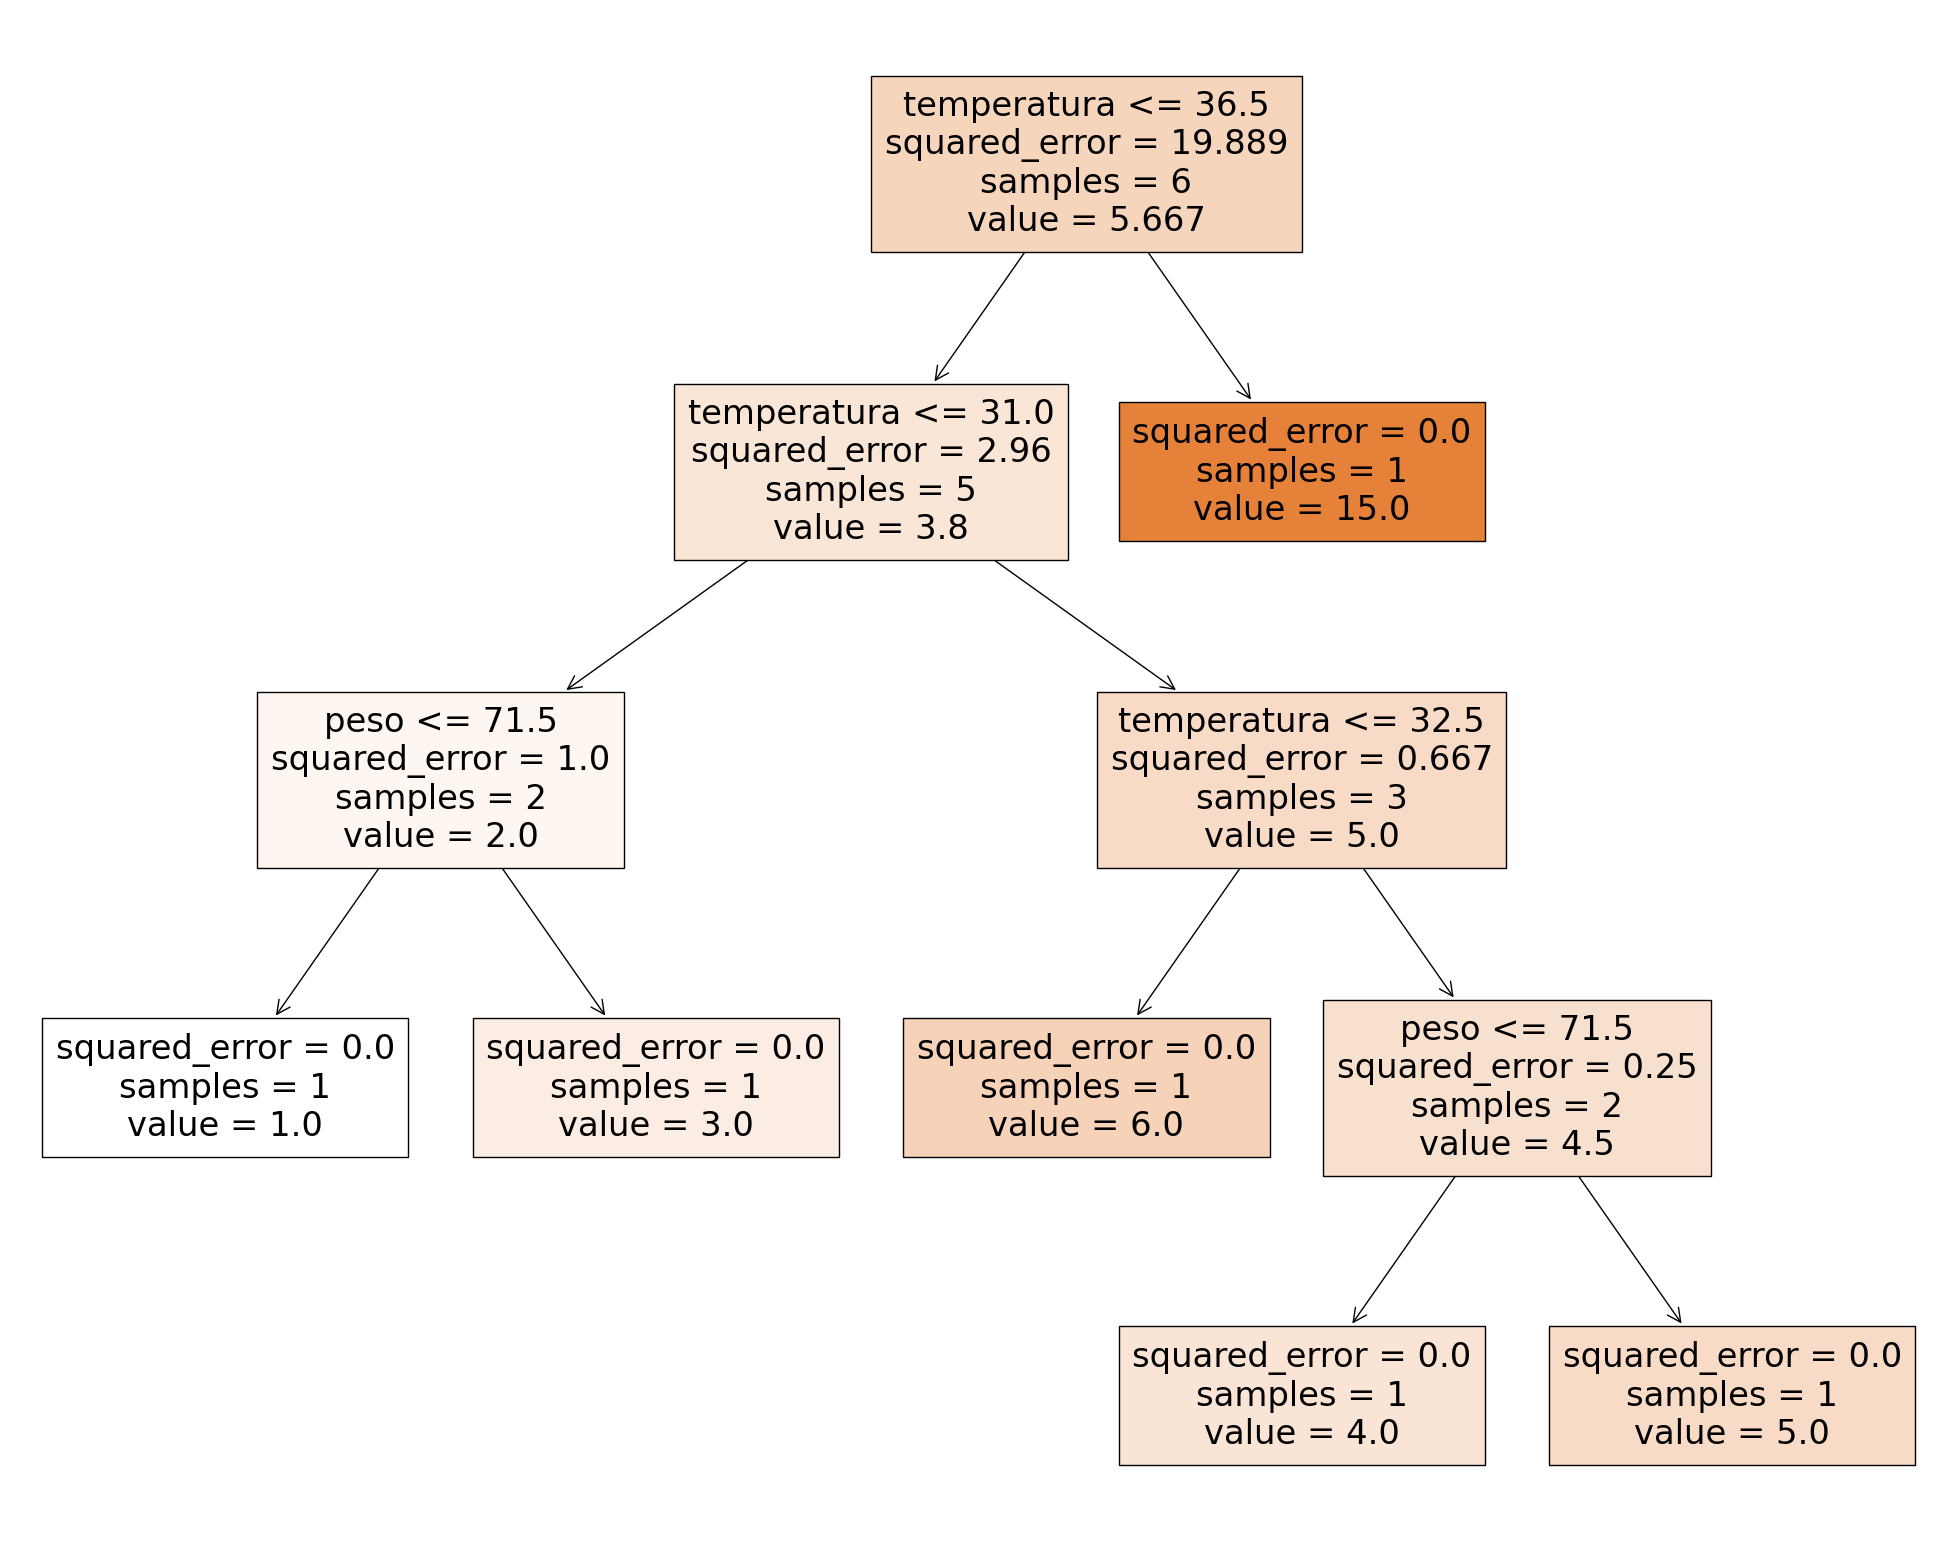

In [29]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(tree_model, feature_names=["temperatura", "peso", "hizo_ejercicio"], filled=True)
plt.show()

## Modelos "Ensemble"

> Un modelo "ensemble" es un método que combina las predicciones de múltiples modelos individuales para mejorar la robustez y precisión de las predicciones. 

Existen distintos tipos de modelo ensemble en función de cómo se "ensamblan" esos modelos individuales. Los dos más importantes son:
- Bagging (Bootstrap Aggregating)
- Boosting

![Bagging vs. Boosting](../data/img/bagging_boosting.jpeg)

### Bagging

#### Random Forest
1. Divide los datos en N conjusntos de datos aleatoriamente mezclados y pudiendo repetir muestras
2. Ajusta un arbol de decisión a cada conjunto
3. Promedia el resultado obtenido por cada arbol

![Random Forest](../data/img/random-forest_bootstrapping.png)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
# random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=1, bootstrap=False)
# random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=3, max_leaf_nodes=2)
random_forest_model = random_forest_model.fit(variables, helados)

In [25]:
mean_absolute_error(helados, random_forest_model.predict(variables))

0.0

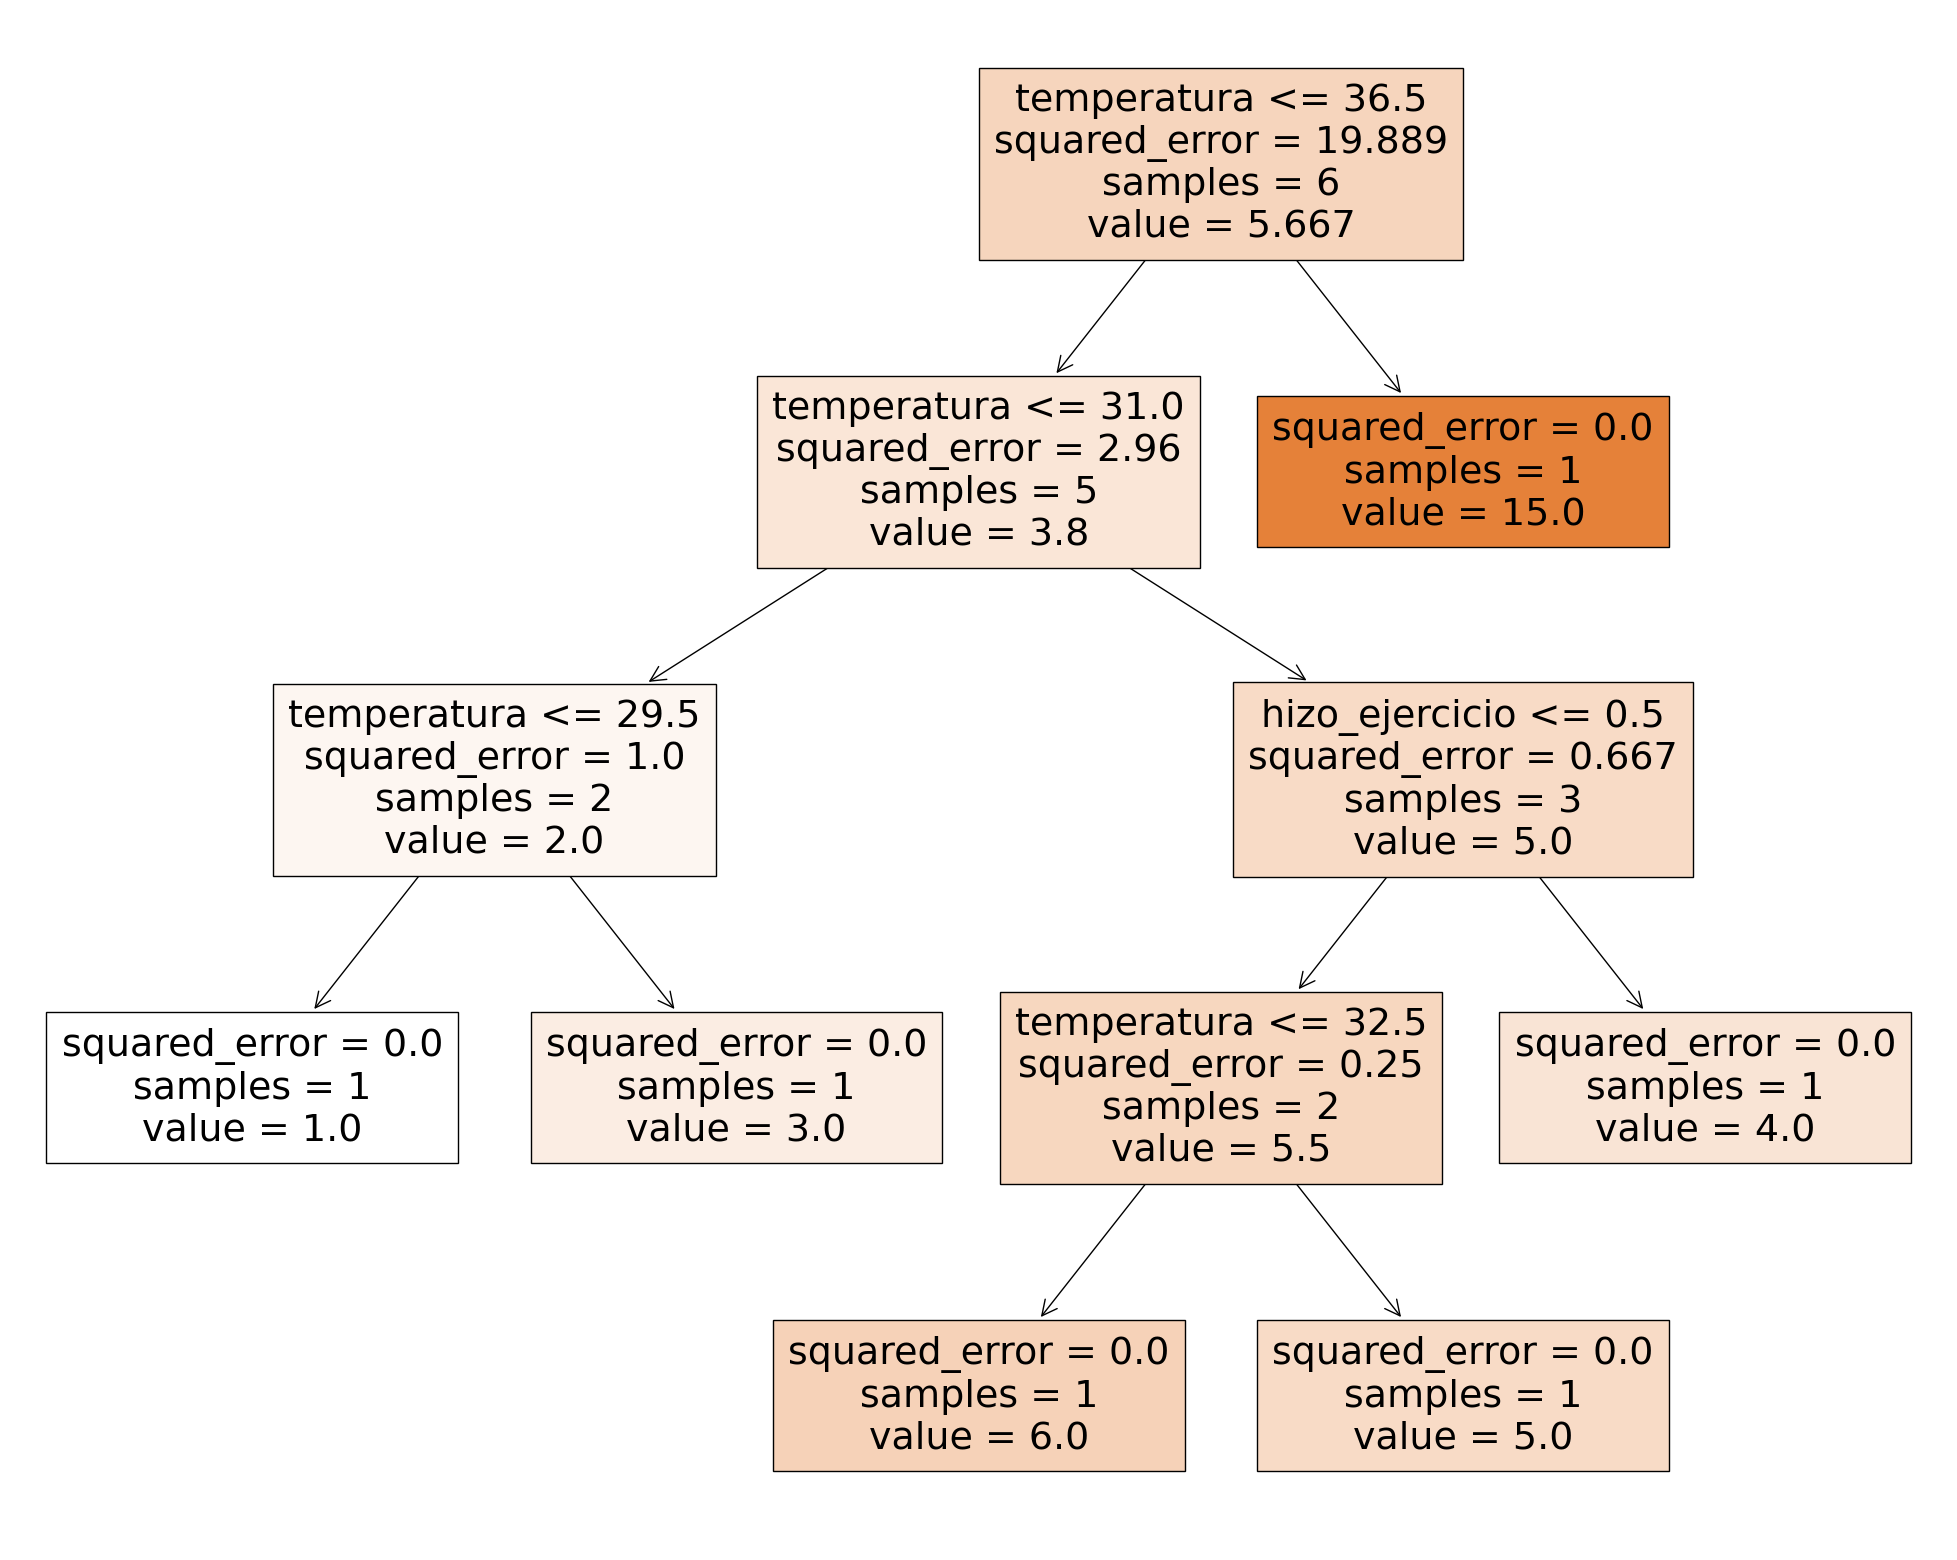

In [26]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(random_forest_model.estimators_[0], feature_names=["temperatura", "peso", "hizo_ejercicio"], filled=True)
plt.show()

### Boosting

#### Gradient Boosting
1. Coge todo el dataset y ajusta un primer árbol de decisión
2. Se calcula el target (Y) y también los errores (residuos)
3. Ajusta un segundo arbol de decisión pero en lugar de ajustarlo al target (Y) lo ajustamos a los errores del anterior paso
4. Se repite el paso 3 N veces
5. De todos los arboles ajustados, del segundo al último arbol, se coge el error predicho, se multiplica por el leanring_rate y se suma a la predicción inicial.

![Bagging vs. Boosting](../data/img/gradient_boost.webp)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# gradient_boost_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gradient_boost_model = GradientBoostingRegressor(random_state=42, n_estimators=1, subsample=1, criterion="squared_error", learning_rate=1, max_depth=None)
# gradient_boost_model = GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3, max_leaf_nodes=2)
gradient_boost_model = gradient_boost_model.fit(variables, helados)

In [ ]:
mean_absolute_error(helados, gradient_boost_model.predict(variables))

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(gradient_boost_model.estimators_[0][0], feature_names=["temperatura", "peso", "hizo_ejercicio"], filled=True)
plt.show()

## Conclusión
Resumen y comparación de los distintos modelos

**Regresión lineal**
- Ajuste muy rápido incluso en datasets grandes
- Muy fácilmente interpretable
- Dificil ajuste a distribuciones no lineales de datos
- Poder predictivo muy limitado
- Imposible overfitting (sobreajuste)

**Bagging (Random Forest)**
- Tiempo de ajuste crece con el volumen de datos y según los parámetros
- Interpretable aunque muy tedioso cuando escala
- Ajusta bien distribuciones no lineales de datos 
- Gran poder predictivo
- Bastante resistente a overfiting

**Boosting (Gradient Boost)**
- El tiempo de ajuste crece con el volumen de datos y según los parámetros
- Interpretable aunque muy tedioso cuando escala
- Ajusta bien distribuciones no lineales de datos 
- Poder predictivo muy alto
- Propenso a overfitting


**Extra:**
El Gradient Boosting ha sido una de las técnicas más populares de la última decada y se han desarrollado distintas implementaciones que mejoran la original en distintos aspectos:
- Aceleración del ajuste con distintas técnicas
- Mejora de poder de predicción
- Mayor resistencia a overfitting
  
Actualmente estos modelos son los mejores a la hora de predecir datos tabulares. Algunos de estos son:
- eXtreme Gradient Boosting (XGBoost)
- LightGBM
- CatBoost (Categorical Boosting)